<a href="https://colab.research.google.com/github/nikhilv2/Machine-Learning/blob/main/KNN%20iris%20flower%20classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("/content/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.info

<bound method DataFrame.info of       Id  SepalLengthCm  ...  PetalWidthCm         Species
0      1            5.1  ...           0.2     Iris-setosa
1      2            4.9  ...           0.2     Iris-setosa
2      3            4.7  ...           0.2     Iris-setosa
3      4            4.6  ...           0.2     Iris-setosa
4      5            5.0  ...           0.2     Iris-setosa
..   ...            ...  ...           ...             ...
145  146            6.7  ...           2.3  Iris-virginica
146  147            6.3  ...           1.9  Iris-virginica
147  148            6.5  ...           2.0  Iris-virginica
148  149            6.2  ...           2.3  Iris-virginica
149  150            5.9  ...           1.8  Iris-virginica

[150 rows x 6 columns]>

In [ ]:
x= data.iloc[:,1:5].values
y = data.iloc[:,5].values

In [ ]:
x.shape

(150, 4)

In [ ]:
##split intp training into testing
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,train_size = 0.85, random_state = 0)

In [ ]:
import numpy as np
np.unique(y,return_counts = True)

(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object),
 array([50, 50, 50]))

In [ ]:
np.unique(ytrain, return_counts=True)

(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object),
 array([43, 39, 45]))

In [ ]:
##Build the model
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 5)

In [ ]:
### Train the model
model.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
ypred = model.predict(xtest)
ypred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [ ]:
ytest

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [ ]:
df = pd.DataFrame()
df["Actual Data"] = ytest
df["Predicted Data"] = ypred
df

,Actual Data,Predicted Data
0,Iris-virginica,Iris-virginica
1,Iris-versicolor,Iris-versicolor
2,Iris-setosa,Iris-setosa
3,Iris-virginica,Iris-virginica
4,Iris-setosa,Iris-setosa
5,Iris-virginica,Iris-virginica
6,Iris-setosa,Iris-setosa
7,Iris-versicolor,Iris-versicolor
8,Iris-versicolor,Iris-versicolor
9,Iris-versicolor,Iris-versicolor


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,ypred)

In [ ]:
cm


array([[ 7,  0,  0],
       [ 0, 10,  1],
       [ 0,  0,  5]])

In [ ]:
from sklearn.metrics import accuracy_score
accu = accuracy_score(ytest,ypred)

In [ ]:
accu

0.9565217391304348

In [ ]:
accuracy = []
k_value = []
for k in range(100):
  if k%3 != 0:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    accu = accuracy_score(ytest,ypred)
    accuracy.append(accu)
    k_value.append(k)

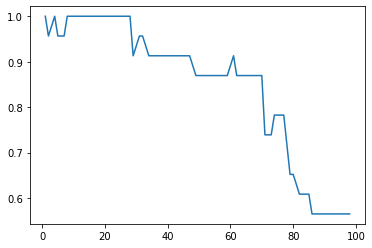

In [ ]:
import matplotlib.pyplot as plt
plt.plot(k_value,accuracy)
plt.show()

In [ ]:
sw = float(input("enter sepal width"))
sl= float(input("Enter sepal length"))
pw= float(input("Enter petal width"))
pl= float(input("Enter sepal length"))
print("The predicted specues is" + model.predict([[sl,sw,pw,pl]]))

enter sepal width4
Enter sepal length4.5
Enter petal width6.5
Enter sepal length1.2
['The predicted specues isIris-virginica']
